**Raw Moodel**

R2: 0.5598
Test RMSE: 243.5651
Cross-Validation RMSE: 241.3766 (+/- 16.8934)


c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


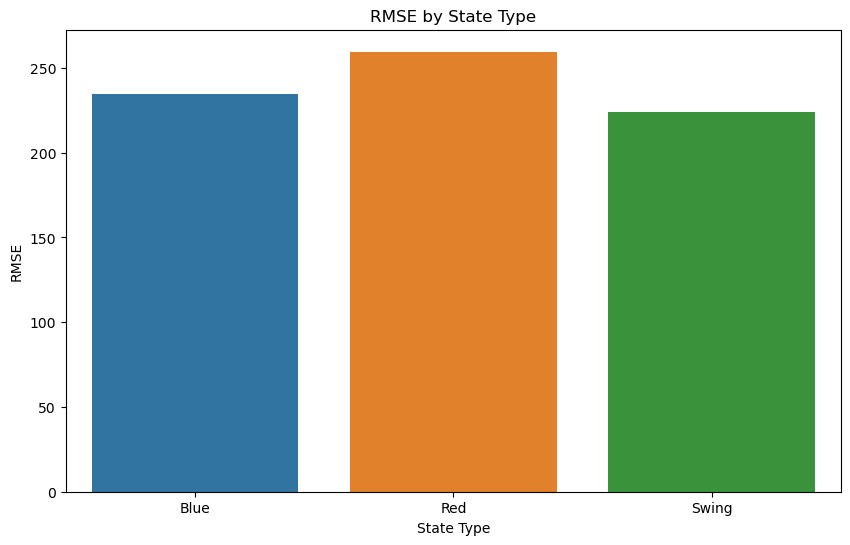

c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


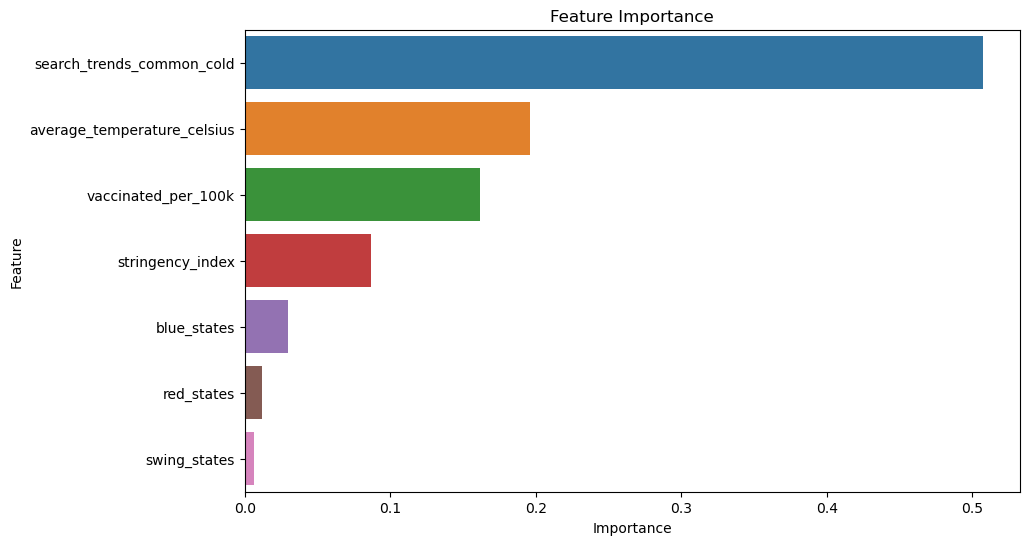

c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


                       Feature  Importance
3    search_trends_common_cold    0.507145
2  average_temperature_celsius    0.196139
0          vaccinated_per_100k    0.161840
1             stringency_index    0.087061
4                  blue_states    0.029852
5                   red_states    0.011505
6                 swing_states    0.006457
Random Forest AIC: 7785.6300
Test MAE: 122.8902


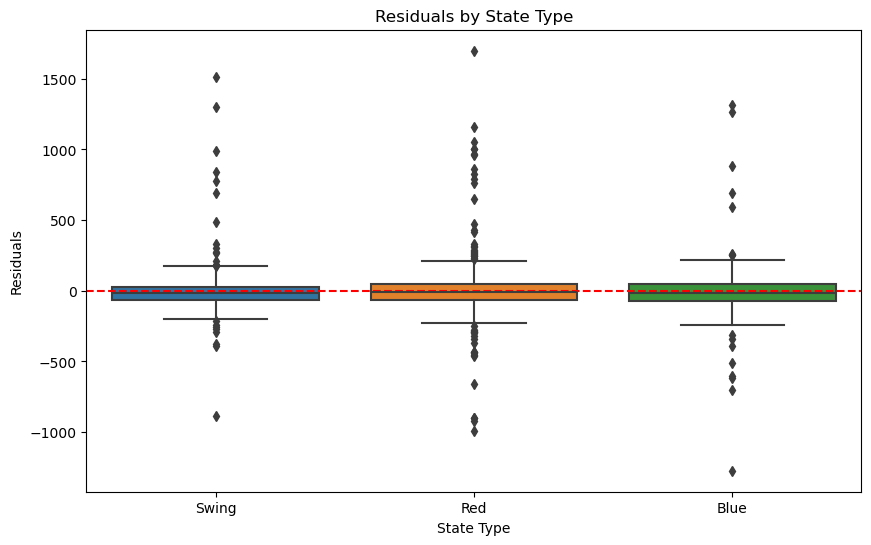


Demographic Parity:
  State Type  Mean Predicted Value
0       Blue            247.422083
1        Red            273.109793
2      Swing            230.309361

Equalized Odds (Residuals):
  State_Type  Mean Residual  Std Residual
0       Blue      -7.011380     234.54616
1        Red      11.216984     259.31789
2      Swing      10.853222     223.66828

Predictive Parity (Mean Absolute Error):
  State Type         MAE
0       Blue  120.551232
1        Red  134.304007
2      Swing  106.395943

Data Points Count by State Type:
  State Type  Counts
0        Red    2507
1      Swing    1526
2       Blue    1417
Red States Count: 1587
Swing States Count: 966
Blue States Count: 897
Train RMSE: 87.0638
Test RMSE: 243.5651


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the data
df = pd.read_csv('processed_data/100k_population_data.csv', low_memory=False)
pvi = pd.read_csv('raw_datasets/cook_pvi/blue-states-2024.csv', low_memory=False)

def classify_state(pvi):
    if pvi >= 5:
        return 'Red State'
    elif pvi <= -5:
        return 'Blue State'
    else:
        return 'Swing State'

# Apply classification function
pvi['classification'] = pvi['BlueStatesPvi2023'].apply(classify_state)

# Generate lists of state abbreviations
red_states = pvi[pvi['classification'] == 'Red State']['state'].tolist()
blue_states = pvi[pvi['classification'] == 'Blue State']['state'].tolist()
swing_states = pvi[pvi['classification'] == 'Swing State']['state'].tolist()

# Convert state names to US_XX format
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

red_states_list = ['US_' + state_abbr[state] for state in red_states]
blue_states_list = ['US_' + state_abbr[state] for state in blue_states]
swing_states_list = ['US_' + state_abbr[state] for state in swing_states]

# Exclude territories
territories_to_exclude = ['US_GU', 'US_VI', 'US_AS', 'US_PR', 'US_MP', 'US_DC']
df = df[~df['location_key'].isin(territories_to_exclude)]

# Create dummy variables for state types
df['blue_states'] = df['location_key'].apply(lambda x: 1 if x in blue_states_list else 0)
df['red_states'] = df['location_key'].apply(lambda x: 1 if x in red_states_list else 0)
df['swing_states'] = df['location_key'].apply(lambda x: 1 if x in swing_states_list else 0)

# Create a state_type column
def get_state_type(row):
    if row['blue_states'] == 1:
        return 'Blue'
    elif row['red_states'] == 1:
        return 'Red'
    elif row['swing_states'] == 1:
        return 'Swing'
    else:
        return 'Other'

df['state_type'] = df.apply(get_state_type, axis=1)

# Select predictors and target variable
X = df[['vaccinated_per_100k', 'stringency_index', 'average_temperature_celsius', 'search_trends_common_cold', 'blue_states', 'red_states', 'swing_states']]
y = df['cases_per_100k']

# Drop rows with missing values in any selected variable or the target
data_cleaned = X.dropna(axis=0, how='any')
y_cleaned = y.loc[data_cleaned.index]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Print evaluation metrics
print(f'R2: {r2:.4f}')
print(f'Test RMSE: {rmse:.4f}')
print(f'Cross-Validation RMSE: {cv_rmse_scores.mean():.4f} (+/- {cv_rmse_scores.std():.4f})')

# RMSE per state type
y_test_df = pd.DataFrame({'cases_per_100k': y_test, 'blue_states': df.loc[y_test.index, 'blue_states'], 'red_states': df.loc[y_test.index, 'red_states'], 'swing_states': df.loc[y_test.index, 'swing_states']})
y_test_df['predicted'] = y_pred

# Create state type column
y_test_df['state_type'] = y_test_df.apply(get_state_type, axis=1)

rmse_by_state_type = y_test_df.groupby('state_type').apply(lambda x: np.sqrt(mean_squared_error(x['cases_per_100k'], x['predicted']))).reset_index()
rmse_by_state_type.columns = ['State Type', 'RMSE']

# Plot RMSE by state type
plt.figure(figsize=(10, 6))
sns.barplot(x='State Type', y='RMSE', data=rmse_by_state_type)
plt.title('RMSE by State Type')
plt.xlabel('State Type')
plt.ylabel('RMSE')
plt.show()

# Feature importance
feature_importances = rf_model.feature_importances_
features = data_cleaned.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print feature importance
print(importance_df)

# AIC calculation
n = len(y_test)
rss = np.sum((y_test - y_pred) ** 2)
k_rf = len(rf_model.estimators_) + 1
aic_rf = n * np.log(rss / n) + 2 * k_rf
print(f'Random Forest AIC: {aic_rf:.4f}')

# Additional model evaluation metrics
test_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {test_mae:.4f}')

# Analyze residuals
residuals = y_test - y_pred
results_df = pd.DataFrame({'Residuals': residuals, 'State_Type': y_test_df['state_type']})

plt.figure(figsize=(10, 6))
sns.boxplot(x='State_Type', y='Residuals', data=results_df)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('State Type')
plt.ylabel('Residuals')
plt.title('Residuals by State Type')
plt.show()

# Statistical Tests

# Fairness Metrics
# Demographic Parity
demographic_parity = y_test_df.groupby('state_type')['predicted'].mean().reset_index()
demographic_parity.columns = ['State Type', 'Mean Predicted Value']
print("\nDemographic Parity:")
print(demographic_parity)

# Equalized Odds (Residuals)
residuals_by_state_type = results_df.groupby('State_Type')['Residuals'].apply(list).reset_index()
residuals_by_state_type['Mean Residual'] = residuals_by_state_type['Residuals'].apply(np.mean)
residuals_by_state_type['Std Residual'] = residuals_by_state_type['Residuals'].apply(np.std)
print("\nEqualized Odds (Residuals):")
print(residuals_by_state_type[['State_Type', 'Mean Residual', 'Std Residual']])

# Predictive Parity (Mean Absolute Error)
mae_by_state_type = y_test_df.groupby('state_type').apply(lambda x: mean_absolute_error(x['cases_per_100k'], x['predicted'])).reset_index()
mae_by_state_type.columns = ['State Type', 'MAE']
print("\nPredictive Parity (Mean Absolute Error):")
print(mae_by_state_type)

# Count data points for each state type
data_points_count = df['state_type'].value_counts().reset_index()
data_points_count.columns = ['State Type', 'Counts']
print("\nData Points Count by State Type:")
print(data_points_count)

blue_count = data_cleaned['blue_states'].sum()
red_count = data_cleaned['red_states'].sum()
swing_count = data_cleaned['swing_states'].sum()
print(f'Red States Count: {red_count}')
print(f'Swing States Count: {swing_count}')
print(f'Blue States Count: {blue_count}')

# Check for overfitting or underfitting
train_pred = rf_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {rmse:.4f}')

**Undersampling**

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
R2: 0.5580
Test RMSE: 263.1168
Cross-Validation RMSE: 235.3365 (+/- 28.3040)


c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


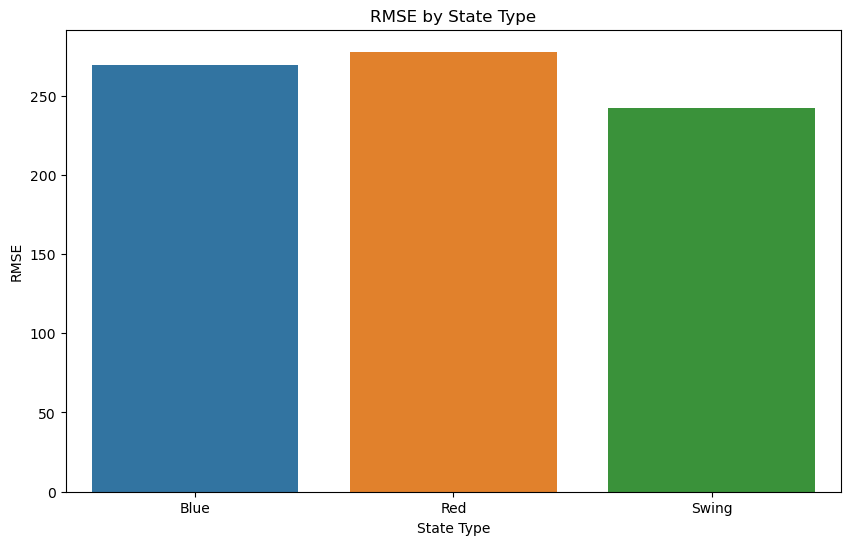

c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


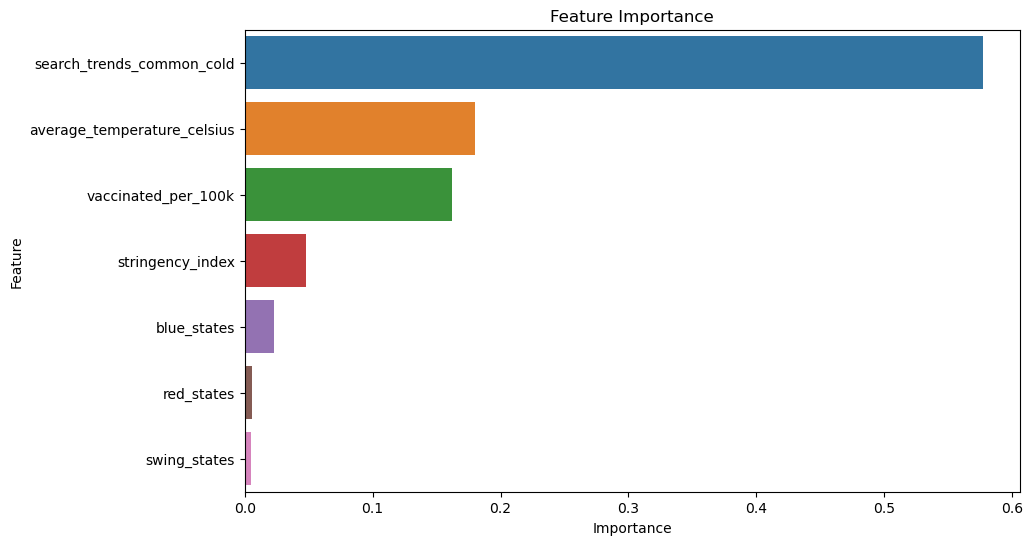

                       Feature  Importance
3    search_trends_common_cold    0.577121
2  average_temperature_celsius    0.180394
0          vaccinated_per_100k    0.161699
1             stringency_index    0.047666
4                  blue_states    0.022476
5                   red_states    0.005694
6                 swing_states    0.004950
Random Forest AIC: 6554.1482
Test MAE: 137.2136


c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


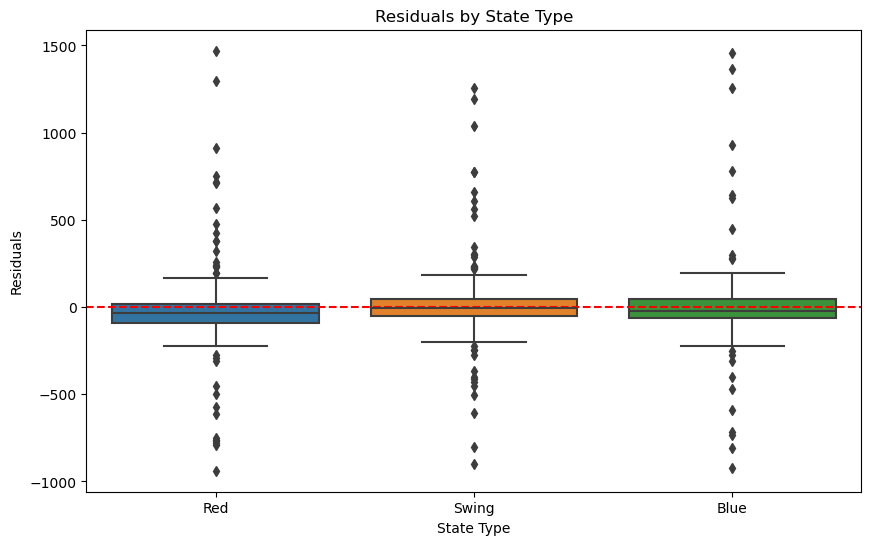


Demographic Parity:
  State Type  Mean Predicted Value
0       Blue            263.314690
1        Red            297.460168
2      Swing            279.305327

Equalized Odds (Residuals):
  State_Type  Mean Residual  Std Residual
0       Blue       3.972305    269.234411
1        Red     -19.379512    277.018753
2      Swing      10.436775    242.151617

Predictive Parity (Mean Absolute Error):
  State Type         MAE
0       Blue  132.070190
1        Red  153.677668
2      Swing  126.181018
Red Data Points: 897
Blue Data Points: 897
Swing Data Points: 966
Train RMSE: 156.9067
Test RMSE: 263.1168


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.utils import resample

# Load the data
df = pd.read_csv('processed_data/100k_population_data.csv', low_memory=False)
pvi = pd.read_csv('raw_datasets/cook_pvi/blue-states-2024.csv', low_memory=False)

def classify_state(pvi):
    if pvi >= 5:
        return 'Red State'
    elif pvi <= -5:
        return 'Blue State'
    else:
        return 'Swing State'

# Apply classification function
pvi['classification'] = pvi['BlueStatesPvi2023'].apply(classify_state)

# Generate lists of state abbreviations
red_states = pvi[pvi['classification'] == 'Red State']['state'].tolist()
blue_states = pvi[pvi['classification'] == 'Blue State']['state'].tolist()
swing_states = pvi[pvi['classification'] == 'Swing State']['state'].tolist()

# Convert state names to US_XX format
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

red_states_list = ['US_' + state_abbr[state] for state in red_states]
blue_states_list = ['US_' + state_abbr[state] for state in blue_states]
swing_states_list = ['US_' + state_abbr[state] for state in swing_states]

# Exclude territories
territories_to_exclude = ['US_GU', 'US_VI', 'US_AS', 'US_PR', 'US_MP', 'US_DC']
df = df[~df['location_key'].isin(territories_to_exclude)]

# Create dummy variables for state types
df['blue_states'] = df['location_key'].apply(lambda x: 1 if x in blue_states_list else 0)
df['red_states'] = df['location_key'].apply(lambda x: 1 if x in red_states_list else 0)
df['swing_states'] = df['location_key'].apply(lambda x: 1 if x in swing_states_list else 0)

# Create a state_type column
def get_state_type(row):
    if row['blue_states'] == 1:
        return 'Blue'
    elif row['red_states'] == 1:
        return 'Red'
    elif row['swing_states'] == 1:
        return 'Swing'
    else:
        return 'Other'

df['state_type'] = df.apply(get_state_type, axis=1)

# Select predictors and target variable
X = df[['vaccinated_per_100k', 'stringency_index', 'average_temperature_celsius', 'search_trends_common_cold', 'blue_states', 'red_states', 'swing_states']]
y = df['cases_per_100k']

# Drop rows with missing values in any selected variable or the target
data_cleaned = X.dropna(axis=0, how='any')
y_cleaned = y.loc[data_cleaned.index]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Combine features and target for resampling
X_combined = data_cleaned.copy()
X_combined['cases_per_100k'] = y_cleaned

# Separate majority and minority classes
df_red = X_combined[X_combined['red_states'] == 1]
df_blue = X_combined[X_combined['blue_states'] == 1]
df_swing = X_combined[X_combined['swing_states'] == 1]

# Downsample and Upsample
df_red_downsampled = resample(df_red,
                              replace=False,
                              n_samples=len(df_blue),
                              random_state=42)

# Combine minority class with downsampled majority class
df_undersampled = pd.concat([df_red_downsampled, df_swing, df_blue])

# Separate input features and target
X_undersampled = df_undersampled.drop('cases_per_100k', axis=1)
y_undersampled = df_undersampled['cases_per_100k']

# Standardize undersampled features
X_undersampled_scaled = scaler.fit_transform(X_undersampled)

# Split the undersampled data into training and testing sets
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled_scaled, y_undersampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the undersampled training data
grid_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest with the best parameters
rf_model_tuned = RandomForestRegressor(**best_params, random_state=42)
rf_model_tuned.fit(X_train_undersampled, y_train_undersampled)

# Evaluate the model
y_pred_undersampled = rf_model_tuned.predict(X_test_undersampled)
r2_undersampled = r2_score(y_test_undersampled, y_pred_undersampled)
rmse_undersampled = np.sqrt(mean_squared_error(y_test_undersampled, y_pred_undersampled))

# Cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores_undersampled = cross_val_score(rf_model_tuned, X_train_undersampled, y_train_undersampled, cv=cv, scoring='neg_mean_squared_error')
cv_rmse_scores_undersampled = np.sqrt(-cv_scores_undersampled)

# Print evaluation metrics
print(f'R2: {r2_undersampled:.4f}')
print(f'Test RMSE: {rmse_undersampled:.4f}')
print(f'Cross-Validation RMSE: {cv_rmse_scores_undersampled.mean():.4f} (+/- {cv_rmse_scores_undersampled.std():.4f})')

# RMSE per state type
y_test_undersampled_df = pd.DataFrame({'cases_per_100k': y_test_undersampled, 'blue_states': df.loc[y_test_undersampled.index, 'blue_states'], 'red_states': df.loc[y_test_undersampled.index, 'red_states'], 'swing_states': df.loc[y_test_undersampled.index, 'swing_states']})
y_test_undersampled_df['predicted'] = y_pred_undersampled

# Create state type column
y_test_undersampled_df['state_type'] = y_test_undersampled_df.apply(get_state_type, axis=1)

rmse_by_state_type_undersampled = y_test_undersampled_df.groupby('state_type').apply(lambda x: np.sqrt(mean_squared_error(x['cases_per_100k'], x['predicted']))).reset_index()
rmse_by_state_type_undersampled.columns = ['State Type', 'RMSE']

# Plot RMSE by state type
plt.figure(figsize=(10, 6))
sns.barplot(x='State Type', y='RMSE', data=rmse_by_state_type_undersampled)
plt.title('RMSE by State Type')
plt.xlabel('State Type')
plt.ylabel('RMSE')
plt.show()

# Feature importance
feature_importances_undersampled = rf_model_tuned.feature_importances_
features = data_cleaned.columns
importance_df_undersampled = pd.DataFrame({'Feature': features, 'Importance': feature_importances_undersampled})
importance_df_undersampled = importance_df_undersampled.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_undersampled)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print feature importance
print(importance_df_undersampled)

# AIC calculation
n_undersampled = len(y_test_undersampled)
rss_undersampled = np.sum((y_test_undersampled - y_pred_undersampled) ** 2)
k_rf_undersampled = len(rf_model_tuned.estimators_) + 1
aic_rf_undersampled = n_undersampled * np.log(rss_undersampled / n_undersampled) + 2 * k_rf_undersampled
print(f'Random Forest AIC: {aic_rf_undersampled:.4f}')

# Additional model evaluation metrics
test_mae_undersampled = mean_absolute_error(y_test_undersampled, y_pred_undersampled)
print(f'Test MAE: {test_mae_undersampled:.4f}')

# Analyze residuals
residuals_undersampled = y_test_undersampled - y_pred_undersampled
results_undersampled_df = pd.DataFrame({'Residuals': residuals_undersampled, 'State_Type': y_test_undersampled_df['state_type']})

plt.figure(figsize=(10, 6))
sns.boxplot(x='State_Type', y='Residuals', data=results_undersampled_df)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('State Type')
plt.ylabel('Residuals')
plt.title('Residuals by State Type')
plt.show()

# Statistical Tests

# Fairness Metrics
# Demographic Parity
demographic_parity_undersampled = y_test_undersampled_df.groupby('state_type')['predicted'].mean().reset_index()
demographic_parity_undersampled.columns = ['State Type', 'Mean Predicted Value']
print("\nDemographic Parity:")
print(demographic_parity_undersampled)

# Equalized Odds (Residuals)
residuals_by_state_type_undersampled = results_undersampled_df.groupby('State_Type')['Residuals'].apply(list).reset_index()
residuals_by_state_type_undersampled['Mean Residual'] = residuals_by_state_type_undersampled['Residuals'].apply(np.mean)
residuals_by_state_type_undersampled['Std Residual'] = residuals_by_state_type_undersampled['Residuals'].apply(np.std)
print("\nEqualized Odds (Residuals):")
print(residuals_by_state_type_undersampled[['State_Type', 'Mean Residual', 'Std Residual']])

# Predictive Parity (Mean Absolute Error)
mae_by_state_type_undersampled = y_test_undersampled_df.groupby('state_type').apply(lambda x: mean_absolute_error(x['cases_per_100k'], x['predicted'])).reset_index()
mae_by_state_type_undersampled.columns = ['State Type', 'MAE']
print("\nPredictive Parity (Mean Absolute Error):")
print(mae_by_state_type_undersampled)

# Count data points for each state type
redc = df_undersampled[df_undersampled['red_states'] == 1]
bluec = df_undersampled[df_undersampled['blue_states'] == 1]
swingc = df_undersampled[df_undersampled['swing_states'] == 1]

print(f"Red Data Points: {len(redc)}")
print(f"Blue Data Points: {len(bluec)}")
print(f"Swing Data Points: {len(swingc)}")

# Check for overfitting or underfitting
train_pred_undersampled = rf_model_tuned.predict(X_train_undersampled)
train_rmse_undersampled = np.sqrt(mean_squared_error(y_train_undersampled, train_pred_undersampled))
print(f'Train RMSE: {train_rmse_undersampled:.4f}')
print(f'Test RMSE: {rmse_undersampled:.4f}')

**Oversampling**

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R2: 0.7431
Test RMSE: 189.2633
Cross-Validation RMSE: 186.5993 (+/- 30.6456)


c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


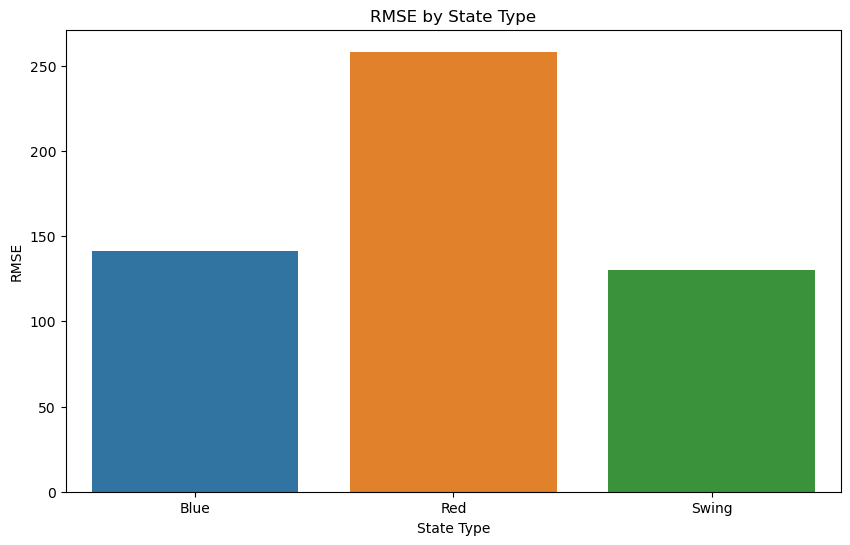

c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


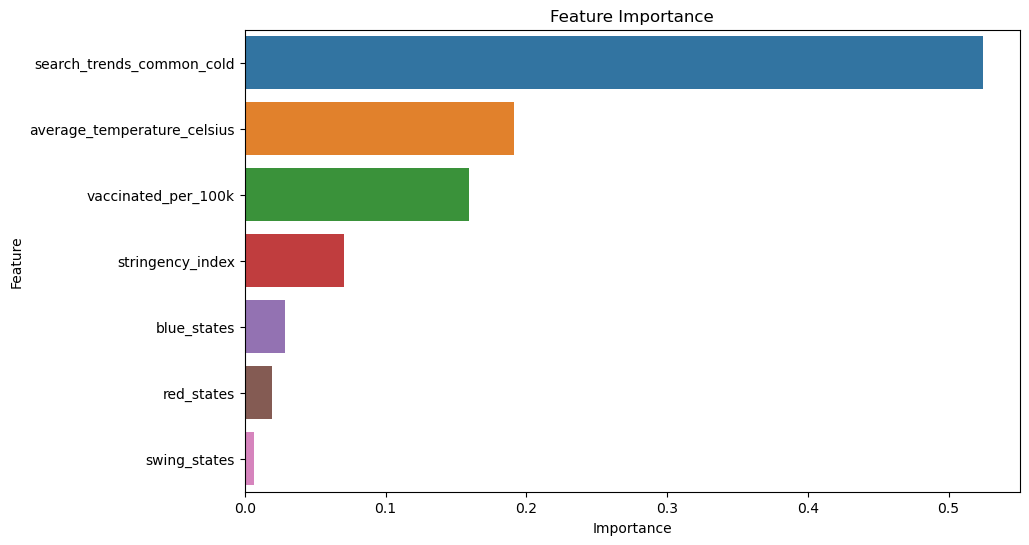

                       Feature  Importance
3    search_trends_common_cold    0.524339
2  average_temperature_celsius    0.191295
0          vaccinated_per_100k    0.159353
1             stringency_index    0.070717
4                  blue_states    0.028850
5                   red_states    0.019032
6                 swing_states    0.006415
Random Forest AIC: 10595.4234
Test MAE: 81.5282


c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


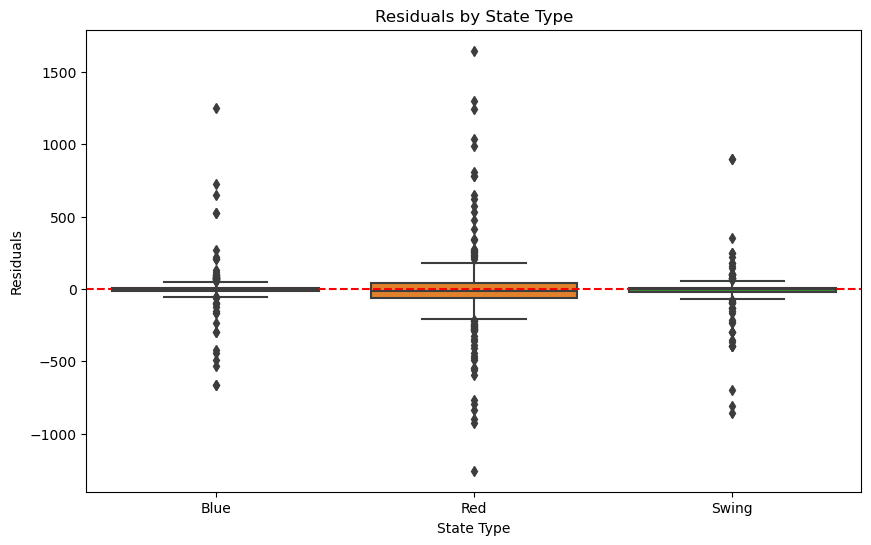


Demographic Parity:
  State Type  Mean Predicted Value
0       Blue            259.603858
1        Red            285.538128
2      Swing            256.424739

Equalized Odds (Residuals):
  State_Type  Mean Residual  Std Residual
0       Blue      -0.020531    141.080319
1        Red     -11.801426    257.880202
2      Swing     -12.354326    129.549330

Predictive Parity (Mean Absolute Error):
  State Type         MAE
0       Blue   53.374068
1        Red  133.108508
2      Swing   51.270192
Red Data Points: 1587
Blue Data Points: 1587
Swing Data Points: 1587
Train RMSE: 64.8243
Test RMSE: 189.2633


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.utils import resample

# Load the data
df = pd.read_csv('processed_data/100k_population_data.csv', low_memory=False)
pvi = pd.read_csv('raw_datasets/cook_pvi/blue-states-2024.csv', low_memory=False)

def classify_state(pvi):
    if pvi >= 5:
        return 'Red State'
    elif pvi <= -5:
        return 'Blue State'
    else:
        return 'Swing State'

# Apply classification function
pvi['classification'] = pvi['BlueStatesPvi2023'].apply(classify_state)

# Generate lists of state abbreviations
red_states = pvi[pvi['classification'] == 'Red State']['state'].tolist()
blue_states = pvi[pvi['classification'] == 'Blue State']['state'].tolist()
swing_states = pvi[pvi['classification'] == 'Swing State']['state'].tolist()

# Convert state names to US_XX format
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

red_states_list = ['US_' + state_abbr[state] for state in red_states]
blue_states_list = ['US_' + state_abbr[state] for state in blue_states]
swing_states_list = ['US_' + state_abbr[state] for state in swing_states]

# Exclude territories
territories_to_exclude = ['US_GU', 'US_VI', 'US_AS', 'US_PR', 'US_MP', 'US_DC']
df = df[~df['location_key'].isin(territories_to_exclude)]

# Create dummy variables for state types
df['blue_states'] = df['location_key'].apply(lambda x: 1 if x in blue_states_list else 0)
df['red_states'] = df['location_key'].apply(lambda x: 1 if x in red_states_list else 0)
df['swing_states'] = df['location_key'].apply(lambda x: 1 if x in swing_states_list else 0)

# Create a state_type column
def get_state_type(row):
    if row['blue_states'] == 1:
        return 'Blue'
    elif row['red_states'] == 1:
        return 'Red'
    elif row['swing_states'] == 1:
        return 'Swing'
    else:
        return 'Other'

df['state_type'] = df.apply(get_state_type, axis=1)

# Select predictors and target variable
X = df[['vaccinated_per_100k', 'stringency_index', 'average_temperature_celsius', 'search_trends_common_cold', 'blue_states', 'red_states', 'swing_states']]
y = df['cases_per_100k']

# Drop rows with missing values in any selected variable or the target
data_cleaned = X.dropna(axis=0, how='any')
y_cleaned = y.loc[data_cleaned.index]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Combine features and target for resampling
X_combined = data_cleaned.copy()
X_combined['cases_per_100k'] = y_cleaned

# Separate majority and minority classes
df_red = X_combined[X_combined['red_states'] == 1]
df_blue = X_combined[X_combined['blue_states'] == 1]
df_swing = X_combined[X_combined['swing_states'] == 1]

df_blue_upsampled = resample(df_blue,
                             replace=True,
                             n_samples=len(df_red),
                             random_state=42)

df_swing_upsampled = resample(df_swing,
                              replace=True,
                              n_samples=len(df_red),
                              random_state=42)

# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_red, df_blue_upsampled, df_swing_upsampled])

# Separate input features and target
X_upsampled = df_upsampled.drop('cases_per_100k', axis=1)
y_upsampled = df_upsampled['cases_per_100k']

# Standardize upsampled features
X_upsampled_scaled = scaler.fit_transform(X_upsampled)

# Split the upsampled data into training and testing sets
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled_scaled, y_upsampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the upsampled training data
grid_search.fit(X_train_upsampled, y_train_upsampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest with the best parameters
rf_model_tuned = RandomForestRegressor(**best_params, random_state=42)
rf_model_tuned.fit(X_train_upsampled, y_train_upsampled)

# Evaluate the model
y_pred_upsampled = rf_model_tuned.predict(X_test_upsampled)
r2_upsampled = r2_score(y_test_upsampled, y_pred_upsampled)
rmse_upsampled = np.sqrt(mean_squared_error(y_test_upsampled, y_pred_upsampled))

# Cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores_upsampled = cross_val_score(rf_model_tuned, X_train_upsampled, y_train_upsampled, cv=cv, scoring='neg_mean_squared_error')
cv_rmse_scores_upsampled = np.sqrt(-cv_scores_upsampled)

# Print evaluation metrics
print(f'R2: {r2_upsampled:.4f}')
print(f'Test RMSE: {rmse_upsampled:.4f}')
print(f'Cross-Validation RMSE: {cv_rmse_scores_upsampled.mean():.4f} (+/- {cv_rmse_scores_upsampled.std():.4f})')

# RMSE per state type
y_test_upsampled_df = pd.DataFrame({'cases_per_100k': y_test_upsampled, 'blue_states': df.loc[y_test_upsampled.index, 'blue_states'], 'red_states': df.loc[y_test_upsampled.index, 'red_states'], 'swing_states': df.loc[y_test_upsampled.index, 'swing_states']})
y_test_upsampled_df['predicted'] = y_pred_upsampled

# Create state type column
y_test_upsampled_df['state_type'] = y_test_upsampled_df.apply(get_state_type, axis=1)

rmse_by_state_type_upsampled = y_test_upsampled_df.groupby('state_type').apply(lambda x: np.sqrt(mean_squared_error(x['cases_per_100k'], x['predicted']))).reset_index()
rmse_by_state_type_upsampled.columns = ['State Type', 'RMSE']

# Plot RMSE by state type
plt.figure(figsize=(10, 6))
sns.barplot(x='State Type', y='RMSE', data=rmse_by_state_type_upsampled)
plt.title('RMSE by State Type')
plt.xlabel('State Type')
plt.ylabel('RMSE')
plt.show()

# Feature importance
feature_importances_upsampled = rf_model_tuned.feature_importances_
features = data_cleaned.columns
importance_df_upsampled = pd.DataFrame({'Feature': features, 'Importance': feature_importances_upsampled})
importance_df_upsampled = importance_df_upsampled.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_upsampled)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print feature importance
print(importance_df_upsampled)

# AIC calculation
n_upsampled = len(y_test_upsampled)
rss_upsampled = np.sum((y_test_upsampled - y_pred_upsampled) ** 2)
k_rf_upsampled = len(rf_model_tuned.estimators_) + 1
aic_rf_upsampled = n_upsampled * np.log(rss_upsampled / n_upsampled) + 2 * k_rf_upsampled
print(f'Random Forest AIC: {aic_rf_upsampled:.4f}')

# Additional model evaluation metrics
test_mae_upsampled = mean_absolute_error(y_test_upsampled, y_pred_upsampled)
print(f'Test MAE: {test_mae_upsampled:.4f}')

# Analyze residuals
residuals_upsampled = y_test_upsampled - y_pred_upsampled
results_upsampled_df = pd.DataFrame({'Residuals': residuals_upsampled, 'State_Type': y_test_upsampled_df['state_type']})

plt.figure(figsize=(10, 6))
sns.boxplot(x='State_Type', y='Residuals', data=results_upsampled_df)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('State Type')
plt.ylabel('Residuals')
plt.title('Residuals by State Type')
plt.show()

# Statistical Tests

# Fairness Metrics
# Demographic Parity
demographic_parity_upsampled = y_test_upsampled_df.groupby('state_type')['predicted'].mean().reset_index()
demographic_parity_upsampled.columns = ['State Type', 'Mean Predicted Value']
print("\nDemographic Parity:")
print(demographic_parity_upsampled)

# Equalized Odds (Residuals)
residuals_by_state_type_upsampled = results_upsampled_df.groupby('State_Type')['Residuals'].apply(list).reset_index()
residuals_by_state_type_upsampled['Mean Residual'] = residuals_by_state_type_upsampled['Residuals'].apply(np.mean)
residuals_by_state_type_upsampled['Std Residual'] = residuals_by_state_type_upsampled['Residuals'].apply(np.std)
print("\nEqualized Odds (Residuals):")
print(residuals_by_state_type_upsampled[['State_Type', 'Mean Residual', 'Std Residual']])

# Predictive Parity (Mean Absolute Error)
mae_by_state_type_upsampled = y_test_upsampled_df.groupby('state_type').apply(lambda x: mean_absolute_error(x['cases_per_100k'], x['predicted'])).reset_index()
mae_by_state_type_upsampled.columns = ['State Type', 'MAE']
print("\nPredictive Parity (Mean Absolute Error):")
print(mae_by_state_type_upsampled)

# Count data points for each state type
redc = df_upsampled[df_upsampled['red_states'] == 1]
bluec = df_upsampled[df_upsampled['blue_states'] == 1]
swingc = df_upsampled[df_upsampled['swing_states'] == 1]

print(f"Red Data Points: {len(redc)}")
print(f"Blue Data Points: {len(bluec)}")
print(f"Swing Data Points: {len(swingc)}")

# Check for overfitting or underfitting
train_pred_upsampled = rf_model_tuned.predict(X_train_upsampled)
train_rmse_upsampled = np.sqrt(mean_squared_error(y_train_upsampled, train_pred_upsampled))
print(f'Train RMSE: {train_rmse_upsampled:.4f}')
print(f'Test RMSE: {rmse_upsampled:.4f}')

**ImbalancedLearningRegression**

r_index: 100%|##########| 1126/1126 [00:00<00:00, 8370.02it/s]


Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R2: 0.8851
Test RMSE: 159.1790
Cross-Validation RMSE: 196.8140 (+/- 10.0956)


c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


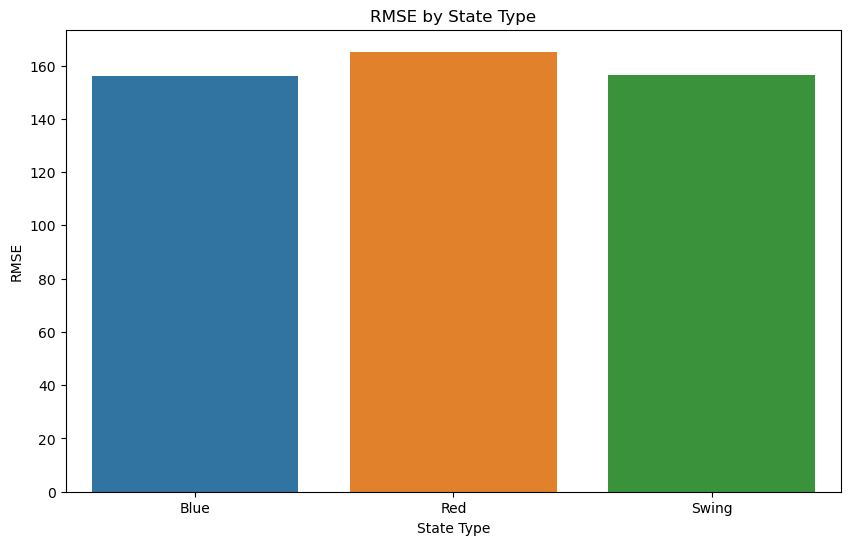

c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


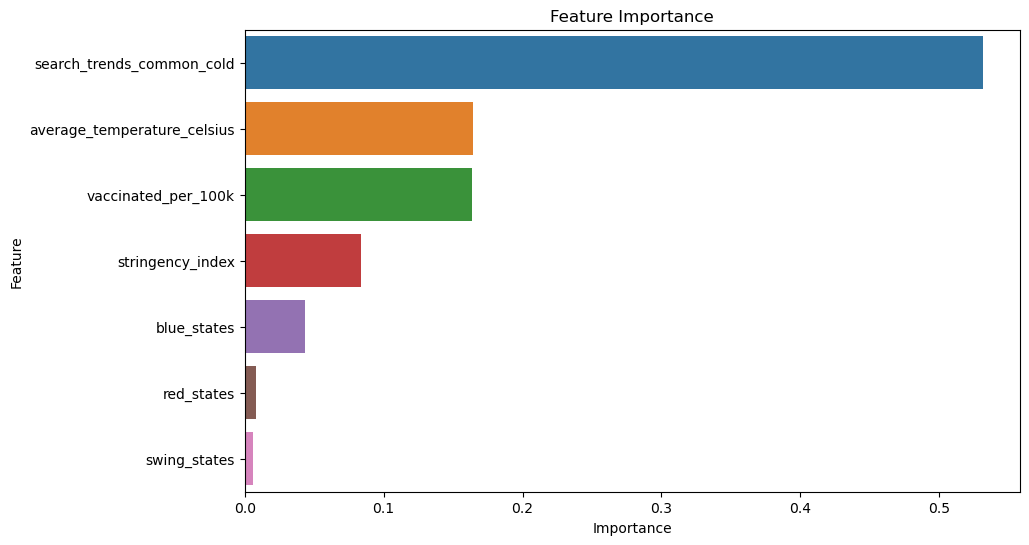

                       Feature  Importance
3    search_trends_common_cold    0.531437
2  average_temperature_celsius    0.164122
0          vaccinated_per_100k    0.163552
1             stringency_index    0.083920
4                  blue_states    0.043268
5                   red_states    0.007797
6                 swing_states    0.005906
Random Forest AIC: 9890.2933
Test MAE: 89.0791


c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


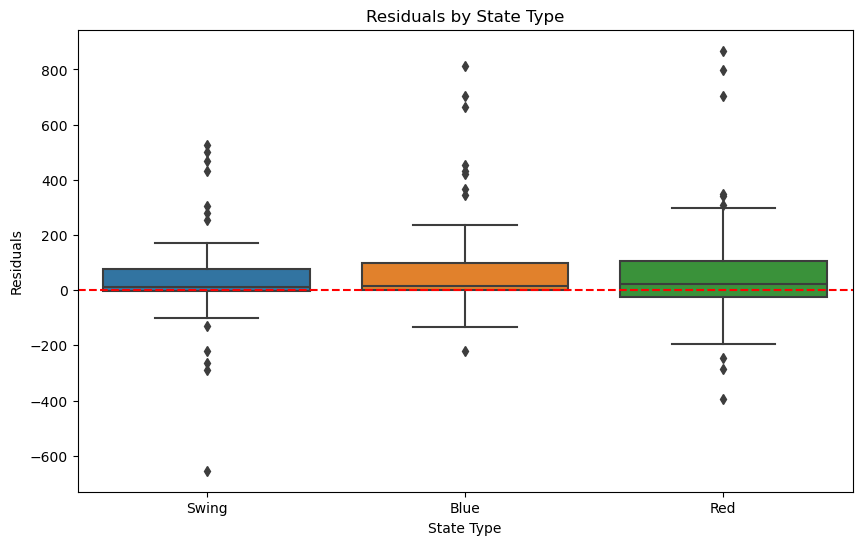


Demographic Parity:
  State Type  Mean Predicted Value
0       Blue            434.157840
1        Red            417.068957
2      Swing            442.608918

Equalized Odds (Residuals):
  State_Type  Mean Residual  Std Residual
0       Blue      93.840108    208.378093
1        Red      59.816674    193.826651
2      Swing      41.096181    190.614633

Predictive Parity (Mean Absolute Error):
  State Type        MAE
0       Blue  88.147165
1        Red  94.461116
2      Swing  85.658632
Red Data Points: 2207
Blue Data Points: 1117
Swing Data Points: 1252
Train RMSE: 65.9768
Test RMSE: 159.1790


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.utils import resample
import ImbalancedLearningRegression as iblr

# Load the data
df = pd.read_csv('processed_data/100k_population_data.csv', low_memory=False)
pvi = pd.read_csv('raw_datasets/cook_pvi/blue-states-2024.csv', low_memory=False)

def classify_state(pvi):
    if pvi >= 5:
        return 'Red State'
    elif pvi <= -5:
        return 'Blue State'
    else:
        return 'Swing State'

# Apply classification function
pvi['classification'] = pvi['BlueStatesPvi2023'].apply(classify_state)

# Generate lists of state abbreviations
red_states = pvi[pvi['classification'] == 'Red State']['state'].tolist()
blue_states = pvi[pvi['classification'] == 'Blue State']['state'].tolist()
swing_states = pvi[pvi['classification'] == 'Swing State']['state'].tolist()

# Convert state names to US_XX format
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

red_states_list = ['US_' + state_abbr[state] for state in red_states]
blue_states_list = ['US_' + state_abbr[state] for state in blue_states]
swing_states_list = ['US_' + state_abbr[state] for state in swing_states]

# Exclude territories
territories_to_exclude = ['US_GU', 'US_VI', 'US_AS', 'US_PR', 'US_MP', 'US_DC']
df = df[~df['location_key'].isin(territories_to_exclude)]

# Create dummy variables for state types
df['blue_states'] = df['location_key'].apply(lambda x: 1 if x in blue_states_list else 0)
df['red_states'] = df['location_key'].apply(lambda x: 1 if x in red_states_list else 0)
df['swing_states'] = df['location_key'].apply(lambda x: 1 if x in swing_states_list else 0)

# Create a state_type column
def get_state_type(row):
    if row['blue_states'] == 1:
        return 'Blue'
    elif row['red_states'] == 1:
        return 'Red'
    elif row['swing_states'] == 1:
        return 'Swing'
    else:
        return np.nan

df['state_type'] = df.apply(get_state_type, axis=1)

# Select predictors and target variable
X = df[['vaccinated_per_100k', 'stringency_index', 'average_temperature_celsius', 'search_trends_common_cold', 'blue_states', 'red_states', 'swing_states']]
y = df['cases_per_100k']

# Drop rows with missing values in any selected variable or the target
data_cleaned = X.dropna(axis=0, how='any')
y_cleaned = y.loc[data_cleaned.index]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Combine features and target for resampling
X_combined = data_cleaned.copy()
X_combined['cases_per_100k'] = y_cleaned
X_combined.reset_index(drop=True, inplace=True)

df_iblr = iblr.ro(data=X_combined, y='cases_per_100k')

# Combine minority class with downsampled majority class
df_upsampled = df_iblr

# Separate input features and target
X_upsampled = df_upsampled.drop('cases_per_100k', axis=1)
y_upsampled = df_upsampled['cases_per_100k']

# Standardize upsampled features
X_upsampled_scaled = scaler.fit_transform(X_upsampled)

# Split the upsampled data into training and testing sets
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled_scaled, y_upsampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the upsampled training data
grid_search.fit(X_train_upsampled, y_train_upsampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest with the best parameters
rf_model_tuned = RandomForestRegressor(**best_params, random_state=42)
rf_model_tuned.fit(X_train_upsampled, y_train_upsampled)

# Evaluate the model
y_pred_upsampled = rf_model_tuned.predict(X_test_upsampled)
r2_upsampled = r2_score(y_test_upsampled, y_pred_upsampled)
rmse_upsampled = np.sqrt(mean_squared_error(y_test_upsampled, y_pred_upsampled))

# Cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores_upsampled = cross_val_score(rf_model_tuned, X_train_upsampled, y_train_upsampled, cv=cv, scoring='neg_mean_squared_error')
cv_rmse_scores_upsampled = np.sqrt(-cv_scores_upsampled)

# Print evaluation metrics
print(f'R2: {r2_upsampled:.4f}')
print(f'Test RMSE: {rmse_upsampled:.4f}')
print(f'Cross-Validation RMSE: {cv_rmse_scores_upsampled.mean():.4f} (+/- {cv_rmse_scores_upsampled.std():.4f})')

# Ensure indices match for state type extraction
y_test_upsampled_df = pd.DataFrame({'cases_per_100k': y_test_upsampled})
y_test_upsampled_df['predicted'] = y_pred_upsampled

# Match indices with original dataframe to get state information
y_test_upsampled_df['original_index'] = y_test_upsampled_df.index
y_test_upsampled_df.reset_index(drop=True, inplace=True)

# Merge to get state types from original dataframe
state_info_df = df[['blue_states', 'red_states', 'swing_states']].reset_index()
y_test_upsampled_df = y_test_upsampled_df.merge(state_info_df, left_on='original_index', right_on='index', how='left')

# Create state type column
y_test_upsampled_df['state_type'] = y_test_upsampled_df.apply(get_state_type, axis=1)

# RMSE per state type
rmse_by_state_type_upsampled = y_test_upsampled_df.groupby('state_type').apply(lambda x: np.sqrt(mean_squared_error(x['cases_per_100k'], x['predicted']))).reset_index()
rmse_by_state_type_upsampled.columns = ['State Type', 'RMSE']

# Plot RMSE by state type
plt.figure(figsize=(10, 6))
sns.barplot(x='State Type', y='RMSE', data=rmse_by_state_type_upsampled)
plt.title('RMSE by State Type')
plt.xlabel('State Type')
plt.ylabel('RMSE')
plt.show()

# Feature importance
feature_importances_upsampled = rf_model_tuned.feature_importances_
features = data_cleaned.columns
importance_df_upsampled = pd.DataFrame({'Feature': features, 'Importance': feature_importances_upsampled})
importance_df_upsampled = importance_df_upsampled.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_upsampled)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print feature importance
print(importance_df_upsampled)

# AIC calculation
n_upsampled = len(y_test_upsampled)
rss_upsampled = np.sum((y_test_upsampled - y_pred_upsampled) ** 2)
k_rf_upsampled = len(rf_model_tuned.estimators_) + 1
aic_rf_upsampled = n_upsampled * np.log(rss_upsampled / n_upsampled) + 2 * k_rf_upsampled
print(f'Random Forest AIC: {aic_rf_upsampled:.4f}')

# Additional model evaluation metrics
test_mae_upsampled = mean_absolute_error(y_test_upsampled, y_pred_upsampled)
print(f'Test MAE: {test_mae_upsampled:.4f}')

# Analyze residuals
residuals_upsampled = y_test_upsampled - y_pred_upsampled
results_upsampled_df = pd.DataFrame({'Residuals': residuals_upsampled, 'State_Type': y_test_upsampled_df['state_type']})

plt.figure(figsize=(10, 6))
sns.boxplot(x='State_Type', y='Residuals', data=results_upsampled_df)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('State Type')
plt.ylabel('Residuals')
plt.title('Residuals by State Type')
plt.show()

# Statistical Tests

# Fairness Metrics
# Demographic Parity
demographic_parity_upsampled = y_test_upsampled_df.groupby('state_type')['predicted'].mean().reset_index()
demographic_parity_upsampled.columns = ['State Type', 'Mean Predicted Value']
print("\nDemographic Parity:")
print(demographic_parity_upsampled)

# Calculate residuals
residuals_upsampled = y_test_upsampled - y_pred_upsampled
results_upsampled_df = pd.DataFrame({'Residuals': residuals_upsampled, 'State_Type': y_test_upsampled_df['state_type']})

# Calculate mean and std of residuals by state type
residuals_by_state_type_upsampled = results_upsampled_df.groupby('State_Type')['Residuals'].agg(['mean', 'std']).reset_index()
residuals_by_state_type_upsampled.columns = ['State_Type', 'Mean Residual', 'Std Residual']
print("\nEqualized Odds (Residuals):")
print(residuals_by_state_type_upsampled)

# Predictive Parity (Mean Absolute Error)
mae_by_state_type_upsampled = y_test_upsampled_df.groupby('state_type').apply(lambda x: mean_absolute_error(x['cases_per_100k'], x['predicted'])).reset_index()
mae_by_state_type_upsampled.columns = ['State Type', 'MAE']
print("\nPredictive Parity (Mean Absolute Error):")
print(mae_by_state_type_upsampled)

# Count data points for each state type
redc = df_upsampled[df_upsampled['red_states'] == 1]
bluec = df_upsampled[df_upsampled['blue_states'] == 1]
swingc = df_upsampled[df_upsampled['swing_states'] == 1]

print(f"Red Data Points: {len(redc)}")
print(f"Blue Data Points: {len(bluec)}")
print(f"Swing Data Points: {len(swingc)}")

# Check for overfitting or underfitting
train_pred_upsampled = rf_model_tuned.predict(X_train_upsampled)
train_rmse_upsampled = np.sqrt(mean_squared_error(y_train_upsampled, train_pred_upsampled))
print(f'Train RMSE: {train_rmse_upsampled:.4f}')
print(f'Test RMSE: {rmse_upsampled:.4f}')

**SMOGN**

r_index: 100%|##########| 527/527 [00:00<00:00, 1465.83it/s]


Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R2: 0.6668
Test RMSE: 320.3975
Cross-Validation RMSE: 299.7606 (+/- 19.4183)


c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


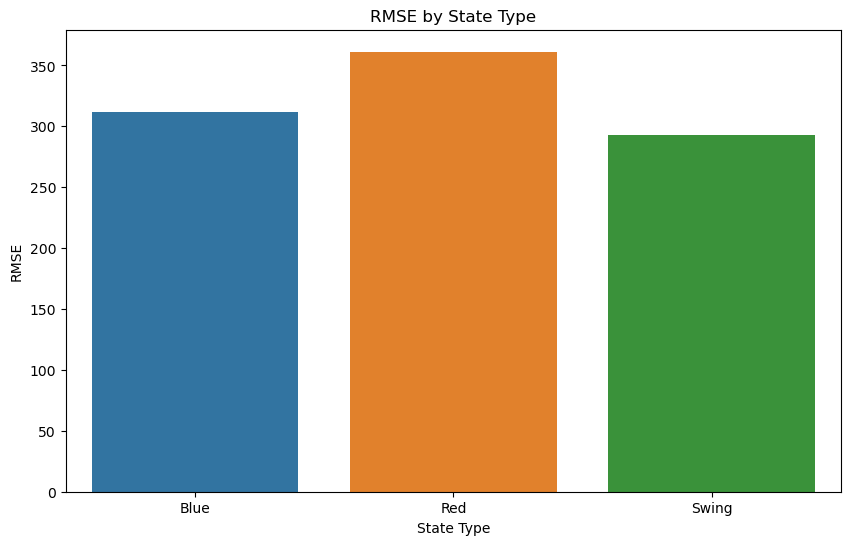

c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kalei\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


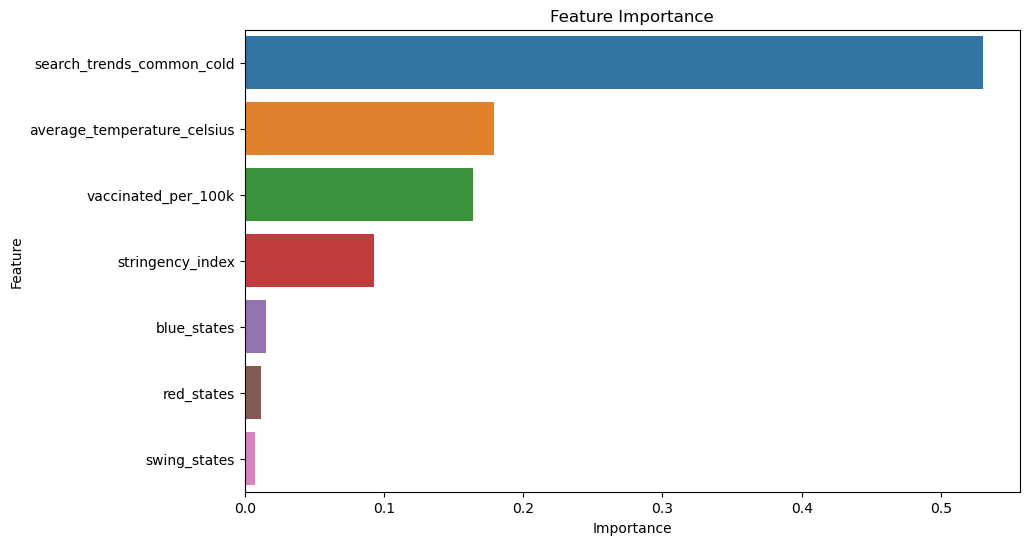

                       Feature  Importance
3    search_trends_common_cold    0.530110
2  average_temperature_celsius    0.178991
0          vaccinated_per_100k    0.163644
1             stringency_index    0.092585
4                  blue_states    0.015187
5                   red_states    0.011859
6                 swing_states    0.007625
Random Forest AIC: 7190.8401
Test MAE: 203.4805


ValueError: cannot reindex on an axis with duplicate labels

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.utils import resample
import smogn

# Load the data
df = pd.read_csv('processed_data/100k_population_data.csv', low_memory=False)
pvi = pd.read_csv('raw_datasets/cook_pvi/blue-states-2024.csv', low_memory=False)

def classify_state(pvi):
    if pvi >= 5:
        return 'Red State'
    elif pvi <= -5:
        return 'Blue State'
    else:
        return 'Swing State'

# Apply classification function
pvi['classification'] = pvi['BlueStatesPvi2023'].apply(classify_state)

# Generate lists of state abbreviations
red_states = pvi[pvi['classification'] == 'Red State']['state'].tolist()
blue_states = pvi[pvi['classification'] == 'Blue State']['state'].tolist()
swing_states = pvi[pvi['classification'] == 'Swing State']['state'].tolist()

# Convert state names to US_XX format
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

red_states_list = ['US_' + state_abbr[state] for state in red_states]
blue_states_list = ['US_' + state_abbr[state] for state in blue_states]
swing_states_list = ['US_' + state_abbr[state] for state in swing_states]

# Exclude territories
territories_to_exclude = ['US_GU', 'US_VI', 'US_AS', 'US_PR', 'US_MP', 'US_DC']
df = df[~df['location_key'].isin(territories_to_exclude)]

# Create dummy variables for state types
df['blue_states'] = df['location_key'].apply(lambda x: 1 if x in blue_states_list else 0)
df['red_states'] = df['location_key'].apply(lambda x: 1 if x in red_states_list else 0)
df['swing_states'] = df['location_key'].apply(lambda x: 1 if x in swing_states_list else 0)

# Create a state_type column
def get_state_type(row):
    if row['blue_states'] == 1:
        return 'Blue'
    elif row['red_states'] == 1:
        return 'Red'
    elif row['swing_states'] == 1:
        return 'Swing'
    else:
        return np.nan

df['state_type'] = df.apply(get_state_type, axis=1)

# Select predictors and target variable
X = df[['vaccinated_per_100k', 'stringency_index', 'average_temperature_celsius', 'search_trends_common_cold', 'blue_states', 'red_states', 'swing_states']]
y = df['cases_per_100k']

# Drop rows with missing values in any selected variable or the target
data_cleaned = X.dropna(axis=0, how='any')
y_cleaned = y.loc[data_cleaned.index]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Combine features and target for resampling
X_combined = data_cleaned.copy()
X_combined['cases_per_100k'] = y_cleaned
X_combined.reset_index(drop=True, inplace=True)

df_smogn = smogn.smoter(data=X_combined, y='cases_per_100k')

# Combine minority class with downsampled majority class
df_upsampled = df_smogn

# Separate input features and target
X_upsampled = df_upsampled.drop('cases_per_100k', axis=1)
y_upsampled = df_upsampled['cases_per_100k']

# Standardize upsampled features
X_upsampled_scaled = scaler.fit_transform(X_upsampled)

# Split the upsampled data into training and testing sets
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled_scaled, y_upsampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the upsampled training data
grid_search.fit(X_train_upsampled, y_train_upsampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest with the best parameters
rf_model_tuned = RandomForestRegressor(**best_params, random_state=42)
rf_model_tuned.fit(X_train_upsampled, y_train_upsampled)

# Evaluate the model
y_pred_upsampled = rf_model_tuned.predict(X_test_upsampled)
r2_upsampled = r2_score(y_test_upsampled, y_pred_upsampled)
rmse_upsampled = np.sqrt(mean_squared_error(y_test_upsampled, y_pred_upsampled))

# Cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores_upsampled = cross_val_score(rf_model_tuned, X_train_upsampled, y_train_upsampled, cv=cv, scoring='neg_mean_squared_error')
cv_rmse_scores_upsampled = np.sqrt(-cv_scores_upsampled)

# Print evaluation metrics
print(f'R2: {r2_upsampled:.4f}')
print(f'Test RMSE: {rmse_upsampled:.4f}')
print(f'Cross-Validation RMSE: {cv_rmse_scores_upsampled.mean():.4f} (+/- {cv_rmse_scores_upsampled.std():.4f})')

# Ensure indices match for state type extraction
y_test_upsampled_df = pd.DataFrame({'cases_per_100k': y_test_upsampled})
y_test_upsampled_df['predicted'] = y_pred_upsampled

# Match indices with original dataframe to get state information
y_test_upsampled_df['original_index'] = y_test_upsampled_df.index
y_test_upsampled_df.reset_index(drop=True, inplace=True)

# Merge to get state types from original dataframe
state_info_df = df[['blue_states', 'red_states', 'swing_states']].reset_index()
y_test_upsampled_df = y_test_upsampled_df.merge(state_info_df, left_on='original_index', right_on='index', how='left')

# Create state type column
y_test_upsampled_df['state_type'] = y_test_upsampled_df.apply(get_state_type, axis=1)

# RMSE per state type
rmse_by_state_type_upsampled = y_test_upsampled_df.groupby('state_type').apply(lambda x: np.sqrt(mean_squared_error(x['cases_per_100k'], x['predicted']))).reset_index()
rmse_by_state_type_upsampled.columns = ['State Type', 'RMSE']

# Plot RMSE by state type
plt.figure(figsize=(10, 6))
sns.barplot(x='State Type', y='RMSE', data=rmse_by_state_type_upsampled)
plt.title('RMSE by State Type')
plt.xlabel('State Type')
plt.ylabel('RMSE')
plt.show()

# Feature importance
feature_importances_upsampled = rf_model_tuned.feature_importances_
features = data_cleaned.columns
importance_df_upsampled = pd.DataFrame({'Feature': features, 'Importance': feature_importances_upsampled})
importance_df_upsampled = importance_df_upsampled.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_upsampled)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print feature importance
print(importance_df_upsampled)

# AIC calculation
n_upsampled = len(y_test_upsampled)
rss_upsampled = np.sum((y_test_upsampled - y_pred_upsampled) ** 2)
k_rf_upsampled = len(rf_model_tuned.estimators_) + 1
aic_rf_upsampled = n_upsampled * np.log(rss_upsampled / n_upsampled) + 2 * k_rf_upsampled
print(f'Random Forest AIC: {aic_rf_upsampled:.4f}')

# Additional model evaluation metrics
test_mae_upsampled = mean_absolute_error(y_test_upsampled, y_pred_upsampled)
print(f'Test MAE: {test_mae_upsampled:.4f}')

# Analyze residuals
residuals_upsampled = y_test_upsampled - y_pred_upsampled
results_upsampled_df = pd.DataFrame({'Residuals': residuals_upsampled, 'State_Type': y_test_upsampled_df['state_type']})

plt.figure(figsize=(10, 6))
sns.boxplot(x='State_Type', y='Residuals', data=results_upsampled_df)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('State Type')
plt.ylabel('Residuals')
plt.title('Residuals by State Type')
plt.show()

# Statistical Tests

# Fairness Metrics
# Demographic Parity
demographic_parity_upsampled = y_test_upsampled_df.groupby('state_type')['predicted'].mean().reset_index()
demographic_parity_upsampled.columns = ['State Type', 'Mean Predicted Value']
print("\nDemographic Parity:")
print(demographic_parity_upsampled)

# Calculate residuals
residuals_upsampled = y_test_upsampled - y_pred_upsampled
results_upsampled_df = pd.DataFrame({'Residuals': residuals_upsampled, 'State_Type': y_test_upsampled_df['state_type']})

# Calculate mean and std of residuals by state type
residuals_by_state_type_upsampled = results_upsampled_df.groupby('State_Type')['Residuals'].agg(['mean', 'std']).reset_index()
residuals_by_state_type_upsampled.columns = ['State_Type', 'Mean Residual', 'Std Residual']
print("\nEqualized Odds (Residuals):")
print(residuals_by_state_type_upsampled)

# Predictive Parity (Mean Absolute Error)
mae_by_state_type_upsampled = y_test_upsampled_df.groupby('state_type').apply(lambda x: mean_absolute_error(x['cases_per_100k'], x['predicted'])).reset_index()
mae_by_state_type_upsampled.columns = ['State Type', 'MAE']
print("\nPredictive Parity (Mean Absolute Error):")
print(mae_by_state_type_upsampled)

# Count data points for each state type
redc = df_upsampled[df_upsampled['red_states'] == 1]
bluec = df_upsampled[df_upsampled['blue_states'] == 1]
swingc = df_upsampled[df_upsampled['swing_states'] == 1]

print(f"Red Data Points: {len(redc)}")
print(f"Blue Data Points: {len(bluec)}")
print(f"Swing Data Points: {len(swingc)}")

# Check for overfitting or underfitting
train_pred_upsampled = rf_model_tuned.predict(X_train_upsampled)
train_rmse_upsampled = np.sqrt(mean_squared_error(y_train_upsampled, train_pred_upsampled))
print(f'Train RMSE: {train_rmse_upsampled:.4f}')
print(f'Test RMSE: {rmse_upsampled:.4f}')